In [31]:
#Importing required packages
from qiskit import *
from qiskit.quantum_info import random_statevector
import numpy as np
import random
from qiskit.visualization import *
from math import *

In [32]:
#Initializing the circuit with 3 quantum and 2 classical registers
q=QuantumRegister(3)
c=ClassicalRegister(2)
circ=QuantumCircuit(q,c)
%matplotlib inline

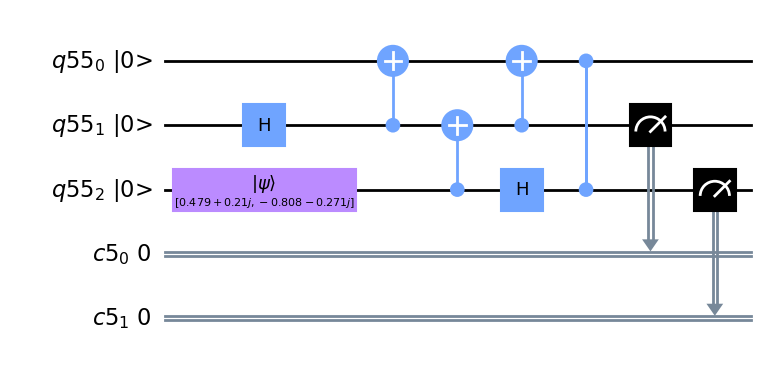

In [33]:
#Creating the circuit and adding the respective gates for Quantum Teleportation
rand_state=random_statevector(2)
#Initializing qubit 2 (sender) to a random state
circ.initialize(rand_state.data,[2])
#Creating the entangled state with qubit 0 and 1
circ.h(1)
circ.cx(1,0)
#Performing CNOT and H operations on sender to create the states to be 'sent'
circ.cx(2,1)
circ.h(2)
#Receving the information based on the qubit values 'sent' by qubit 2 
circ.cx(1,0)
circ.cz(2,0)
#Measuring the qubits
circ.measure(2,1)
circ.measure(1,0)

circ.draw(initial_state=True, output="mpl",cregbundle=False)

Initial state of qubit 2 (sender):  (0.479+0.21j) |0> +  (-0.808-0.271j) |1>


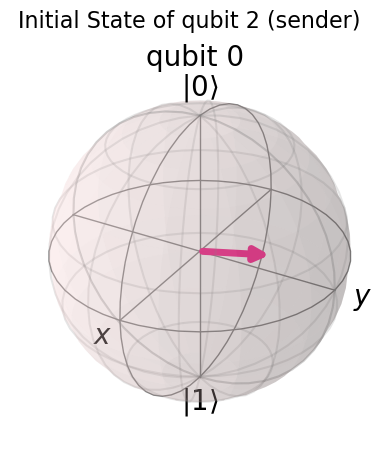

In [34]:
#Initial state of qubit 2 (sender)
print("Initial state of qubit 2 (sender): ",np.around(rand_state[0],3),"|0> + ",np.around(rand_state[1],3),"|1>")
plot_bloch_multivector(rand_state,title="Initial State of qubit 2 (sender)")

Statevector([ 0.        +0.j        ,  0.        +0.j        ,
              0.47861243+0.2104775j , -0.80824492-0.27086807j,
              0.        +0.j        ,  0.        +0.j        ,
              0.        +0.j        ,  0.        -0.j        ],
            dims=(2, 2, 2))


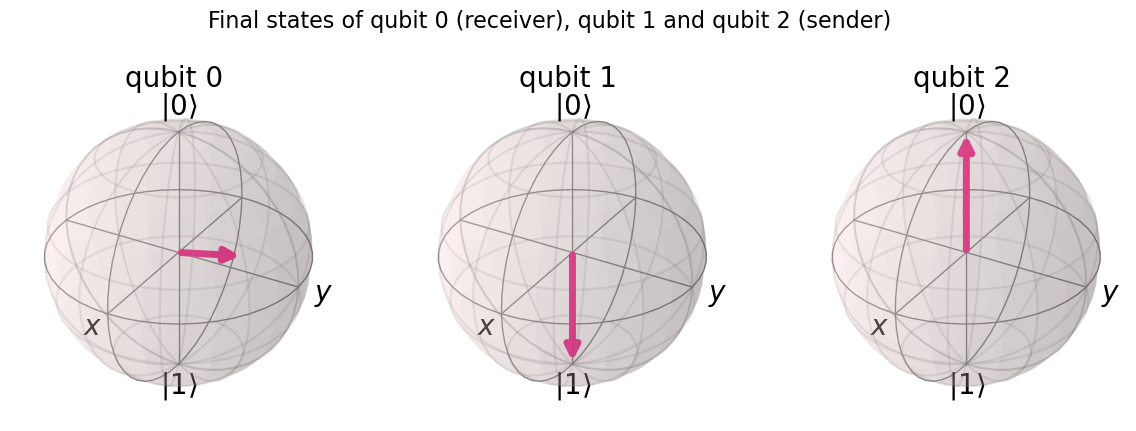

In [35]:
#Executing the simulation
sim= Aer.get_backend('statevector_simulator')
res=execute(circ,backend=sim).result()
#circ.save_statevector()
#Getting the results of the circuit and plotting the respective qubit bloch spheres
#fin_state = sim.run(circ).result().get_statevector()
fin_state=res.get_statevector()
print(fin_state)
plot_bloch_multivector(fin_state,title="Final states of qubit 0 (receiver), qubit 1 and qubit 2 (sender)")

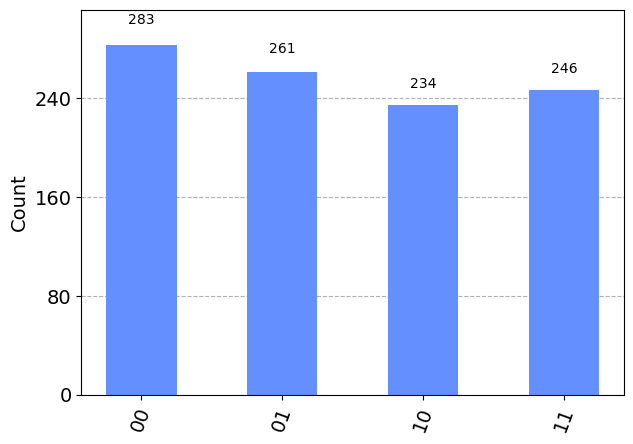

In [36]:
sim=Aer.get_backend('qasm_simulator')
res=execute(circ,backend=sim).result()
plot_histogram(res.get_counts(circ))